In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

file='../project/player_real_final.csv'
df=pd.read_csv(file)

In [201]:
df=df[['overall', 'potential','value_euro']]
df.head()

,overall,potential,value_euro
0,93,93,78000000.0
1,92,92,119500000.0
2,91,91,45000000.0
3,91,91,129000000.0
4,91,91,125500000.0


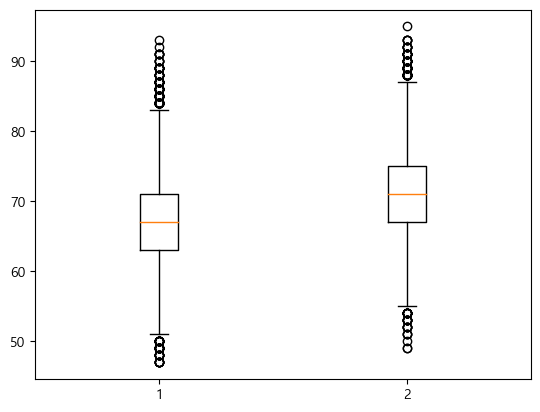

In [202]:
plt.boxplot(feature)
plt.show()

In [203]:
df.corr()['value_euro']

overall       0.589850
potential     0.569162
value_euro    1.000000
Name: value_euro, dtype: float64

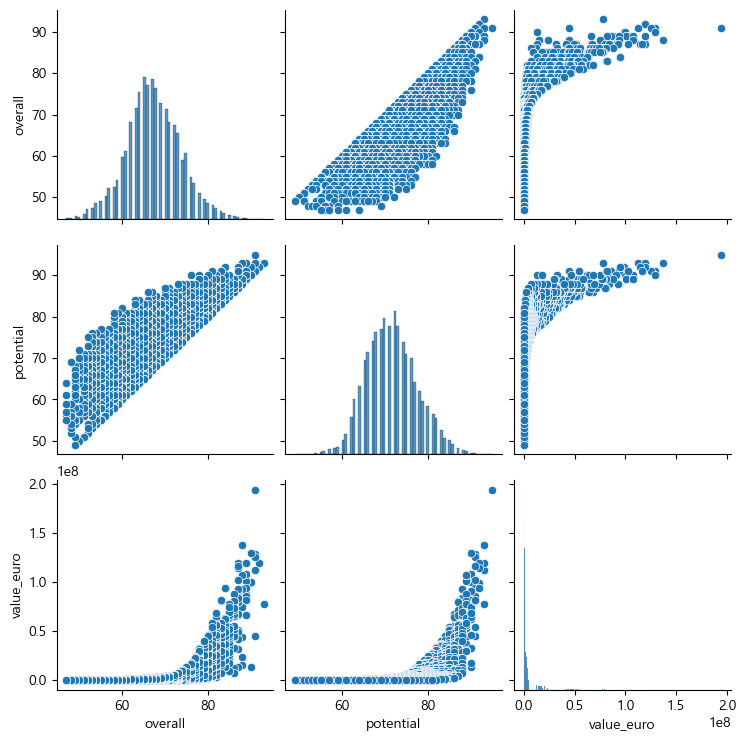

In [204]:
import seaborn as sns
sns.pairplot(df)

In [205]:
feature=df[['overall', 'potential']]
target=df['value_euro']

In [206]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, target, 
                                                    test_size=0.2, random_state=7 )
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, 
                                                    test_size=0.2, random_state=7 )

### DecisionTreeRegressor

In [207]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(train_x,train_y)

DecisionTreeRegressor()

In [208]:
def get_reg_score(test_y, pred_y):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # 평균절대오차 : MAE
    mae = mean_absolute_error(test_y, pred_y)

    # 평균제곱오차 : MSE
    mse = mean_squared_error(test_y, pred_y)
    
    # 평균제곱근오차 : RMSE
    rmse = mean_squared_error(test_y, pred_y, squared=False)

    # 결정계수 : R2
    r2 = r2_score(test_y, pred_y)
    
    print(f'MAE : {mae:.4f}, MSE : {mse:.4f}, RMSE : {rmse:.4f}, R-squared : {r2:.4f}')

In [209]:
pred_y=dt_model.predict(train_x)
get_reg_score(train_y, pred_y)

MAE : 491049.6855, MSE : 3992448067659.6401, RMSE : 1998111.1250, R-squared : 0.9483


In [210]:
pred_y=dt_model.predict(val_x)
get_reg_score(val_y, pred_y)

MAE : 450777.0256, MSE : 2111577701082.2378, RMSE : 1453126.8703, R-squared : 0.9579


In [211]:
pred_y=dt_model.predict(test_x)
get_reg_score(test_y, pred_y)

MAE : 486665.2221, MSE : 5220440660353.6172, RMSE : 2284828.3656, R-squared : 0.9270


### HistGradientBoostingRegressor

In [212]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [213]:
hgb_model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
hgb_model.fit(train_x, train_y)

HistGradientBoostingRegressor(random_state=42)

In [214]:
pred_y=hgb_model.predict(train_x)
get_reg_score(train_y, pred_y)

MAE : 559175.8390, MSE : 5934547620126.0977, RMSE : 2436092.6953, R-squared : 0.9232


In [215]:
pred_y=hgb_model.predict(val_x)
get_reg_score(val_y, pred_y)

MAE : 470622.6677, MSE : 2392938088210.6431, RMSE : 1546912.4372, R-squared : 0.9522


In [216]:
pred_y=hgb_model.predict(test_x)
get_reg_score(test_y, pred_y)

MAE : 478894.5162, MSE : 3518800101079.9907, RMSE : 1875846.5025, R-squared : 0.9508


## hgb_model 예측값 csv 저장

In [217]:
file='../project/player_real_final.csv'
df_=pd.read_csv(file)

In [218]:
df_.head(20)

,name,overall,potential,value_euro,wage_eruo,player_url,player_face_url,age,height_cm,weight_kg,club,league,position,attacking,skill,movement,power,mentality,defending,goalkeeping
0,L. Messi,93,93,78000000.0,320000.0,https://sofifa.com/player/158023/lionel-messi/...,https://cdn.sofifa.net/players/158/023/22_120.png,34,170,72,Paris Saint-Germain,French Ligue 1,RW,85.8,79.000000,90.2,77.8,73.833333,28.250000,10.8
1,R. Lewandowski,92,92,119500000.0,270000.0,https://sofifa.com/player/188545/robert-lewand...,https://cdn.sofifa.net/players/188/545/22_120.png,32,185,81,FC Bayern München,German 1. Bundesliga,ST,86.0,68.500000,81.6,84.8,80.666667,35.000000,10.2
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,https://cdn.sofifa.net/players/020/801/22_120.png,36,187,83,Manchester United,English Premier League,ST,87.6,70.500000,85.4,87.2,74.333333,28.500000,11.6
3,Neymar Jr,91,91,129000000.0,270000.0,https://sofifa.com/player/190871/neymar-da-sil...,https://cdn.sofifa.net/players/190/871/22_120.png,29,175,68,Paris Saint-Germain,French Ligue 1,LW,80.6,75.166667,90.2,71.8,77.000000,33.250000,11.8
4,K. De Bruyne,91,91,125500000.0,350000.0,https://sofifa.com/player/192985/kevin-de-bruy...,https://cdn.sofifa.net/players/192/985/22_120.png,30,181,70,Manchester City,English Premier League,RCM,81.4,74.000000,80.0,81.6,82.666667,62.500000,11.2
5,J. Oblak,91,93,112000000.0,130000.0,https://sofifa.com/player/200389/jan-oblak/220002,https://cdn.sofifa.net/players/200/389/22_120.png,28,188,87,Atlético de Madrid,Spain Primera Division,GK,19.0,18.333333,61.4,53.6,34.666667,19.000000,87.4
6,K. Mbappé,91,95,194000000.0,230000.0,https://sofifa.com/player/231747/kylian-mbappe...,https://cdn.sofifa.net/players/231/747/22_120.png,22,182,73,Paris Saint-Germain,French Ligue 1,ST,82.2,68.166667,92.4,82.2,73.500000,32.000000,8.4
7,M. Neuer,90,90,13500000.0,86000.0,https://sofifa.com/player/167495/manuel-neuer/...,https://cdn.sofifa.net/players/167/495/22_120.png,35,193,93,FC Bayern München,German 1. Bundesliga,GK,24.8,28.333333,57.4,56.8,43.000000,12.666667,88.8
8,M. ter Stegen,90,92,99000000.0,250000.0,https://sofifa.com/player/192448/marc-andre-te...,https://cdn.sofifa.net/players/192/448/22_120.png,29,187,85,FC Barcelona,Spain Primera Division,GK,23.6,24.166667,51.2,53.6,40.166667,16.000000,87.8
9,H. Kane,90,90,129500000.0,240000.0,https://sofifa.com/player/202126/harry-kane/22...,https://cdn.sofifa.net/players/202/126/22_120.png,27,188,89,Tottenham Hotspur,English Premier League,ST,86.6,67.500000,74.4,84.8,81.166667,42.750000,10.8


In [219]:
feature=df_[['overall', 'potential']]
target=df_['value_euro']

In [220]:
hgb_model.predict(feature)

hgb_pred_y=hgb_model.predict(feature)
get_reg_score(target, hgb_pred_y)

MAE : 528945.4010, MSE : 4884556143092.7510, RMSE : 2210103.1974, R-squared : 0.9320


In [221]:
dt_model.predict(feature)

dt_pred_y=dt_model.predict(feature)
get_reg_score(target, dt_pred_y)

MAE : 483728.2941, MSE : 3937142524761.0967, RMSE : 1984223.4060, R-squared : 0.9451


In [222]:
df_['value_pred_hgb']=hgb_pred_y

In [223]:
df_['value_pred_dt']=dt_pred_y

In [224]:
df_.to_csv('value_pred.csv', index=False)